In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Mall_Customers.csv')
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]


In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [8]:

kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(X_scaled)
df['Cluster'] = kmeans.labels_


c:\Users\Jeyanthan GJ\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


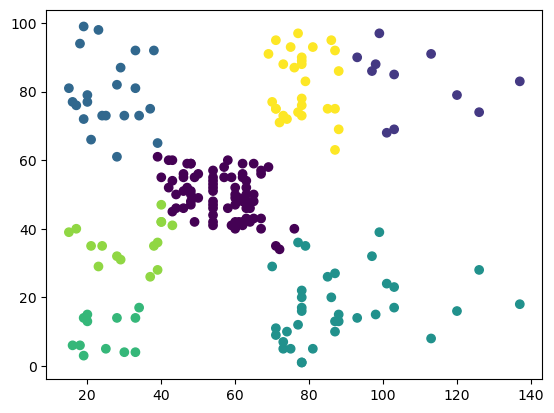

In [9]:
plt.scatter(X['Annual Income (k$)'], 
            X['Spending Score (1-100)'], 
            c=df['Cluster'])
plt.savefig('marketing_clusters.png')
plt.show()


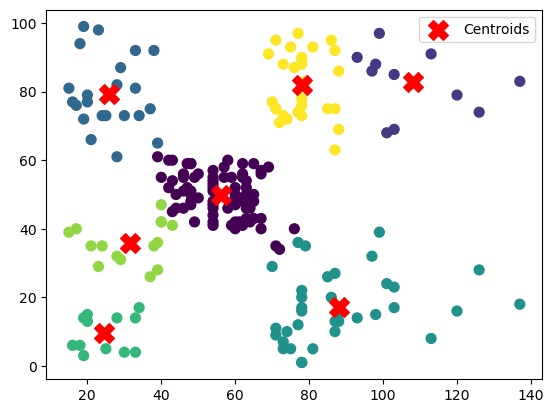

In [10]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=df['Cluster'], cmap="viridis", s=50)
plt.scatter(centers[:,0], centers[:,1], c="red", marker="X", s=200, label="Centroids")
plt.legend()
plt.show()


In [ ]:

cluster_profile = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
cluster_profile['Count'] = df['Cluster'].value_counts().sort_index()

print(cluster_profile)


         Annual Income (k$)  Spending Score (1-100)  Count
Cluster                                                   
0                 56.051948               49.857143     77
1                108.181818               82.727273     11
2                 25.727273               79.363636     22
3                 88.200000               17.114286     35
4                 24.583333                9.583333     12
5                 31.533333               35.866667     15
6                 78.035714               81.892857     28
